The solution is divided into the following sections:

Data understanding and exploration
Data cleaning
Data preparation
Model building and evaluation

### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

Libraries used

In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats

from sklearn.linear_model import LinearRegression as lm_
from sklearn.metrics import mean_absolute_error


Data collection

In [126]:
# Load your dataset
dataset = pd.read_csv("C:\\Users\\91749\\mlopsmovie\\data\\raw\\DataSet1.csv")

In [127]:
#number of entries and features
dataset.shape

(608, 18)

In [128]:
# Display the first few rows of the dataset
dataset.head()


,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22-05-2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14-03-2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15-08-2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16-03-2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28-06-2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


In [152]:
# Replace empty string ('') with np.nan
dataset['Profit ($mill)']=dataset['Profit ($mill)'].replace(',','',regex=True)
dataset['Overseas ($mill)']=dataset['Overseas ($mill)'].replace(',','',regex=True)
dataset['Adjusted Gross ($mill)']=dataset['Adjusted Gross ($mill)'].replace(',','',regex=True)
dataset['Gross ($mill)']=dataset['Gross ($mill)'].replace(',','',regex=True)


In [153]:
dataset['Profit ($mill)'] = dataset['Profit ($mill)'].astype(float)
dataset['Overseas ($mill)'] =dataset['Overseas ($mill)'].astype(float)
dataset['Adjusted Gross ($mill)'] =dataset['Adjusted Gross ($mill)'].astype(float)
dataset['Gross ($mill)'] =dataset['Gross ($mill)'].astype(float)

In [154]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Day of Week             608 non-null    object 
 1   Director                608 non-null    object 
 2   Genre                   608 non-null    object 
 3   Movie Title             608 non-null    object 
 4   Release Date            608 non-null    object 
 5   Studio                  608 non-null    object 
 6   Adjusted Gross ($mill)  608 non-null    float64
 7   Budget ($mill)          608 non-null    float64
 8   Gross ($mill)           608 non-null    float64
 9   IMDb Rating             608 non-null    float64
 10  MovieLens Rating        608 non-null    float64
 11  Overseas ($mill)        608 non-null    float64
 12  Overseas%               608 non-null    float64
 13  Profit ($mill)          608 non-null    float64
 14  Profit%                 608 non-null    fl

In [155]:
WeekDay='Day of Week'
dataset[WeekDay].astype('category').value_counts()


Friday       448
Wednesday    119
Thursday      27
Tuesday       10
Saturday       3
Sunday         1
Name: Day of Week, dtype: int64

In [156]:
dataset['Studio'].astype('category').value_counts()


WB                          93
Buena Vista Studios         93
Fox                         85
Universal                   79
Sony                        65
Paramount Pictures          62
Pacific Data/DreamWorks     16
New Line Cinema             16
DreamWorks                  14
TriStar                     10
MiraMax                     10
MGM                          8
Weinstein Company            6
Lionsgate                    6
WB/New Line                  5
Colombia Pictures            5
Lionsgate/Summit             4
Summit Entertainment         4
Fox Searchlight Pictures     4
Gramercy Pictures            2
UA Entertainment             2
Revolution Studios           2
Screen Gems                  2
Orion                        2
Disney                       2
New Market Films             1
Vestron Pictures             1
Dimension Films              1
USA                          1
IFC                          1
Path_ Distribution           1
StudioCanal                  1
Sony Pic

In [157]:
dataset['Director'].astype('category').value_counts()


Steven Spielberg            19
Robert Zemeckis              9
Michael Bay                  8
Tim Burton                   7
Ridley Scott                 7
                            ..
Jerry Zucker                 1
Jesse Dylan                  1
Joe Pytka                    1
Joe Russo, Anthony Russo     1
Jonathan Mostow              1
Name: Director, Length: 337, dtype: int64

In [158]:
dataset['Genre'].astype('category').value_counts()


action         236
animation       97
comedy          91
drama           52
adventure       50
sci-fi          16
thriller        15
biography       14
crime           10
horror           8
fantasy          6
romance          6
mystery          3
documentary      2
musical          2
Name: Genre, dtype: int64

In [159]:
dataset['Movie Title'].astype('category').value_counts()

10,000 B.C.                       1
Speed                             1
Skyfall                           1
Sleepless in Seattle              1
Sleepy Hollow                     1
                                 ..
Home                              1
Home Alone                        1
Home Alone 2: Lost in New York    1
Honey, I Shrunk the Kids          1
You've Got Mail                   1
Name: Movie Title, Length: 608, dtype: int64

Correlation

In [160]:
# correlation matrix
cor = dataset.corr()
cor


C:\Users\91749\AppData\Local\Temp\ipykernel_3272\3390890813.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = dataset.corr()


,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
Adjusted Gross ($mill),1.000000,0.148537,0.655192,0.272071,0.225777,0.594668,0.042319,0.686806,0.229841,0.341415,0.645391,-0.042319
Budget ($mill),0.148537,1.000000,0.511863,-0.026303,-0.031066,0.536799,0.301011,0.311910,-0.298632,0.218664,0.360020,-0.301011
Gross ($mill),0.655192,0.511863,1.000000,0.267442,0.212869,0.967853,0.243778,0.975851,-0.001589,0.280370,0.864803,-0.243778
IMDb Rating,0.272071,-0.026303,0.267442,1.000000,0.879836,0.222273,-0.034393,0.302620,0.077253,0.326788,0.304335,0.034393
MovieLens Rating,0.225777,-0.031066,0.212869,0.879836,1.000000,0.167901,-0.057060,0.243528,0.049759,0.302791,0.260240,0.057060
Overseas ($mill),0.594668,0.536799,0.967853,0.222273,0.167901,1.000000,0.445308,0.934006,-0.027440,0.277475,0.710714,-0.445308
Overseas%,0.042319,0.301011,0.243778,-0.034393,-0.057060,0.445308,1.000000,0.193524,-0.084881,0.086538,-0.207146,-1.000000
Profit ($mill),0.686806,0.311910,0.975851,0.302620,0.243528,0.934006,0.193524,1.000000,0.074189,0.254618,0.864833,-0.193524
Profit%,0.229841,-0.298632,-0.001589,0.077253,0.049759,-0.027440,-0.084881,0.074189,1.000000,-0.042088,0.050342,0.084881
Runtime (min),0.341415,0.218664,0.280370,0.326788,0.302791,0.277475,0.086538,0.254618,-0.042088,1.000000,0.230268,-0.086538


Data visualization and analysis

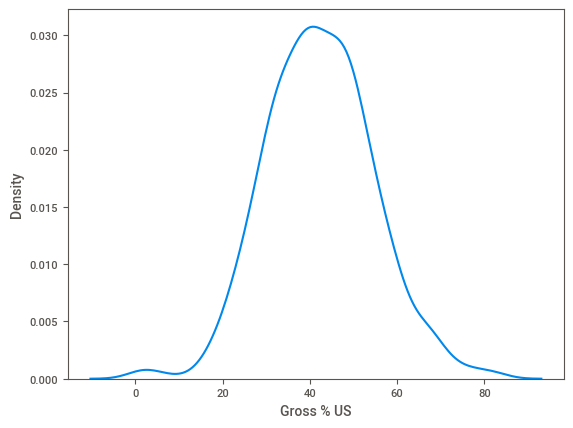

In [43]:
# @title Gross % US

sns.kdeplot(dataset['Gross % US'])
plt.show()


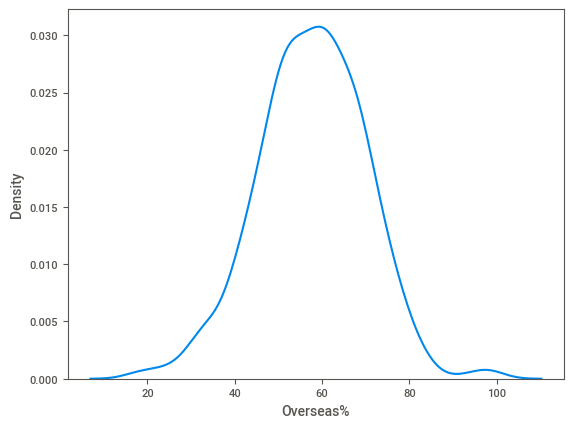

In [45]:
# @title Overseas%


sns.kdeplot(dataset['Overseas%'])
plt.show()

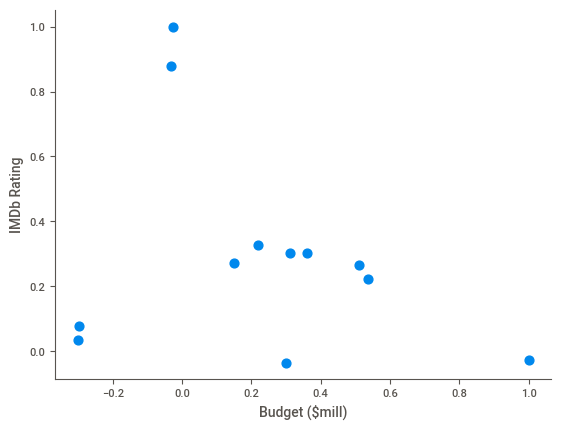

In [201]:
# @title Budget ($mill) vs IMDb Rating


cor.plot(kind='scatter', x='Budget ($mill)', y='IMDb Rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

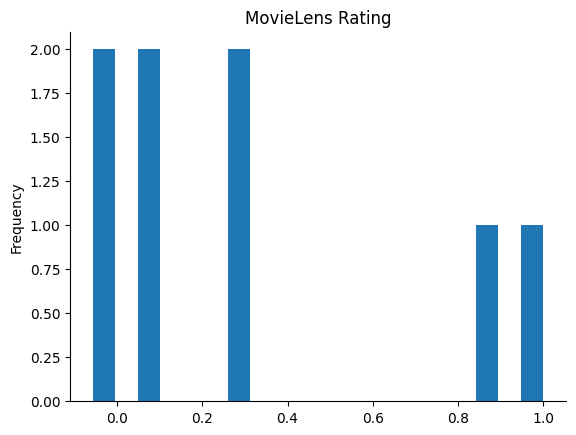

In [ ]:
# @title MovieLens Rating


cor['MovieLens Rating'].plot(kind='hist', bins=20, title='MovieLens Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

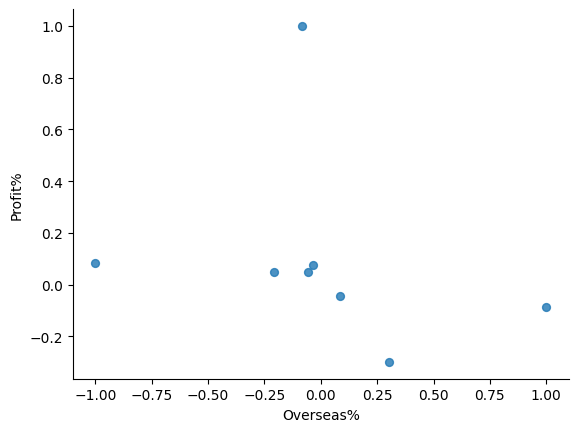

In [ ]:
# @title Overseas% vs Profit%

cor.plot(kind='scatter', x='Overseas%', y='Profit%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

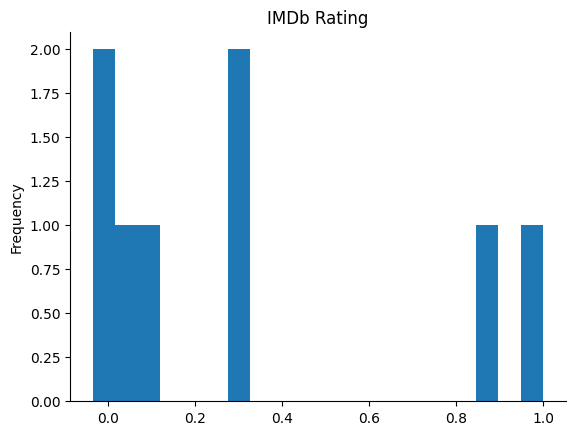

In [ ]:
# @title IMDb Rating

cor['IMDb Rating'].plot(kind='hist', bins=20, title='IMDb Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

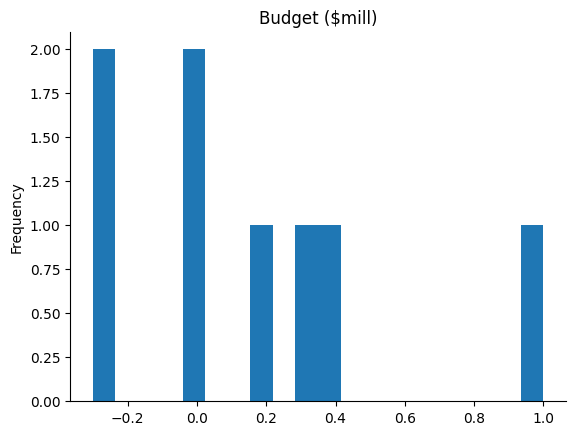

In [ ]:
# @title Budget ($mill)

cor['Budget ($mill)'].plot(kind='hist', bins=20, title='Budget ($mill)')
plt.gca().spines[['top', 'right',]].set_visible(False)

plotting correlations on a heatmap

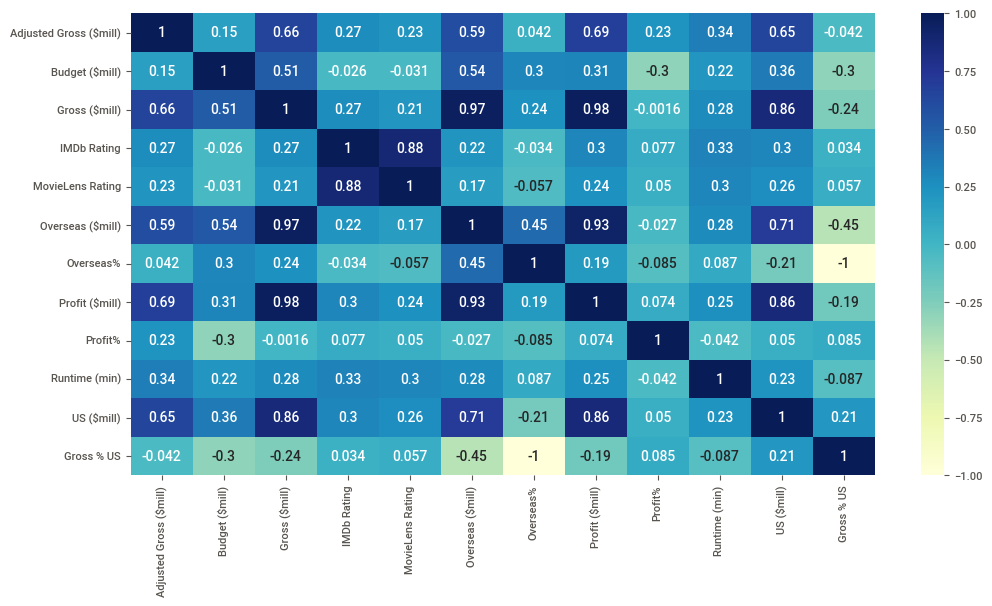

In [163]:
# figure size
plt.figure(figsize=(12,6))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

C:\Users\91749\AppData\Local\Temp\ipykernel_3272\2035825840.py:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.drop('Profit ($mill)', axis=1).corrwith(dataset['Profit ($mill)']).plot(kind='bar', grid=True, figsize=(20, 8), title='Gross ($mill)',color="lightgreen");


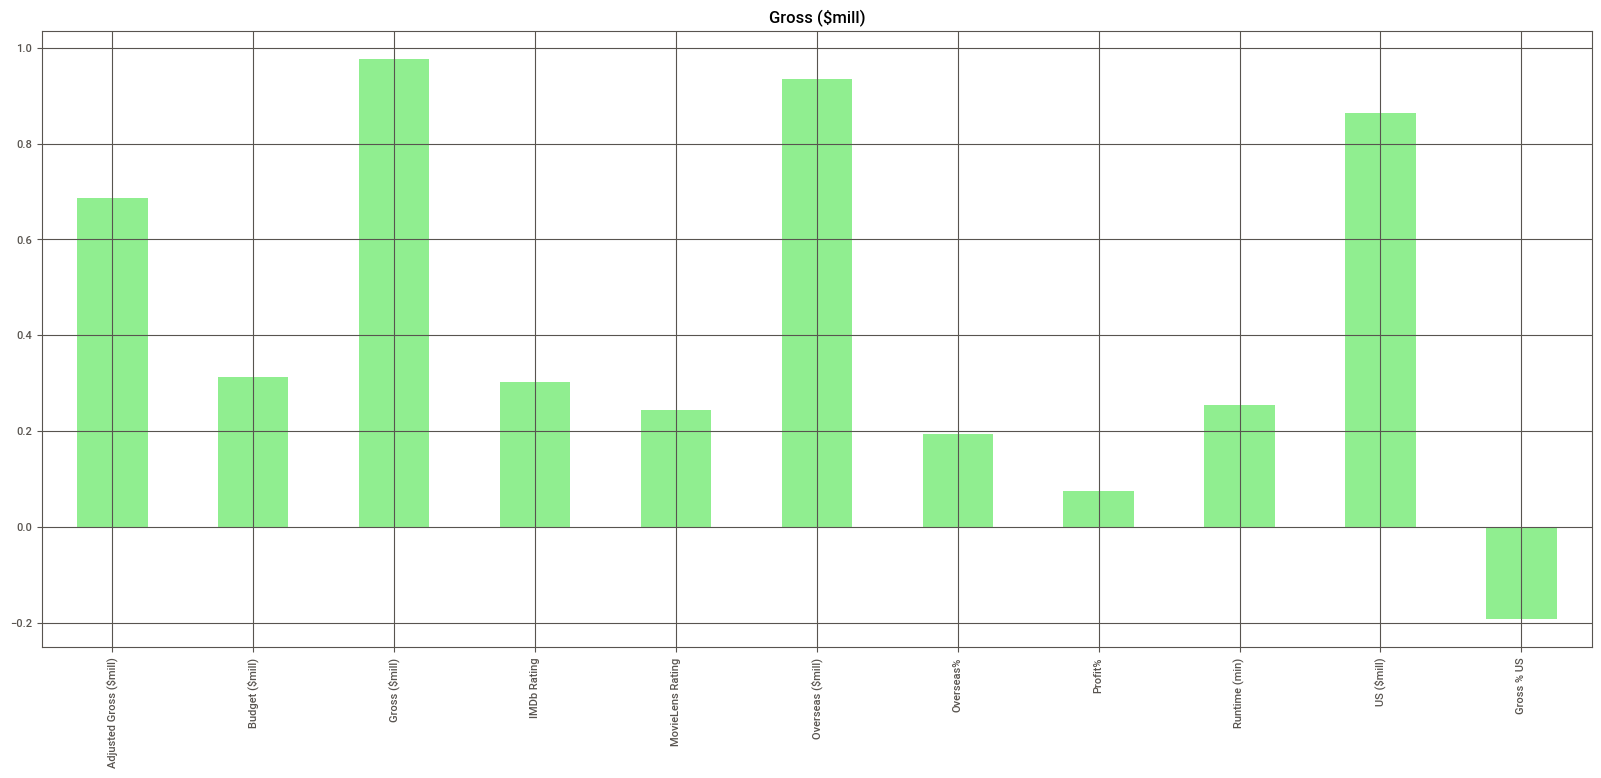

In [233]:
#correlation of car features with price
dataset.drop('Profit ($mill)', axis=1).corrwith(dataset['Profit ($mill)']).plot(kind='bar', grid=True, figsize=(20, 8), title='Gross ($mill)',color="lightgreen");

### Re-creating the same chart as shown-Movie % Domestic Gross

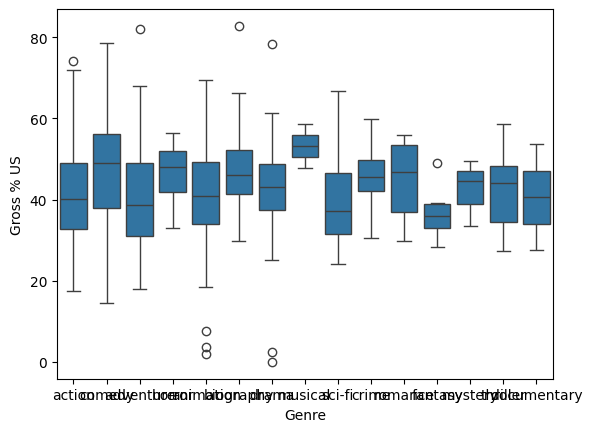

In [ ]:


sns.boxplot( y="Gross % US", x='Genre', data= dataset )
plt.show()

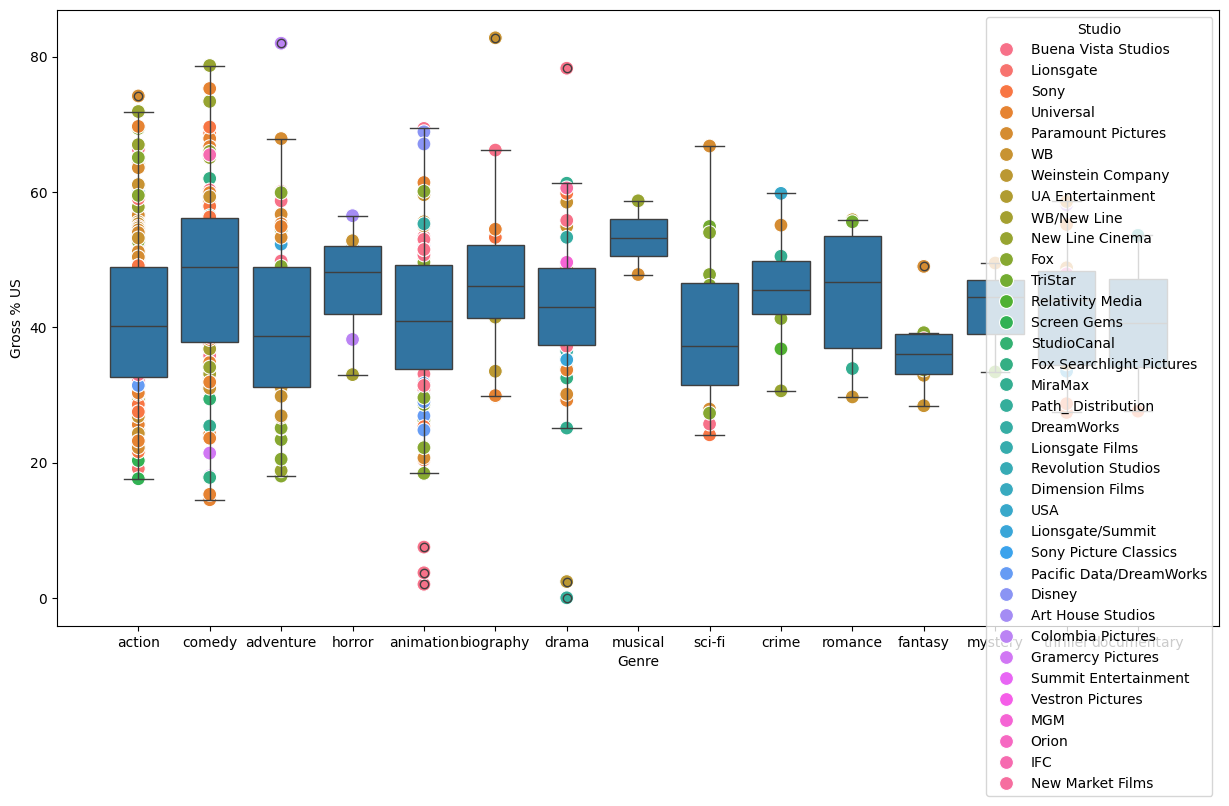

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(y="Gross % US", x='Genre', data=dataset)
sns.scatterplot(y="Gross % US", x='Genre', hue='Studio', data=dataset, marker='o', s=100)  # Adjust marker and size as needed
plt.show()

Data preparation and cleaning

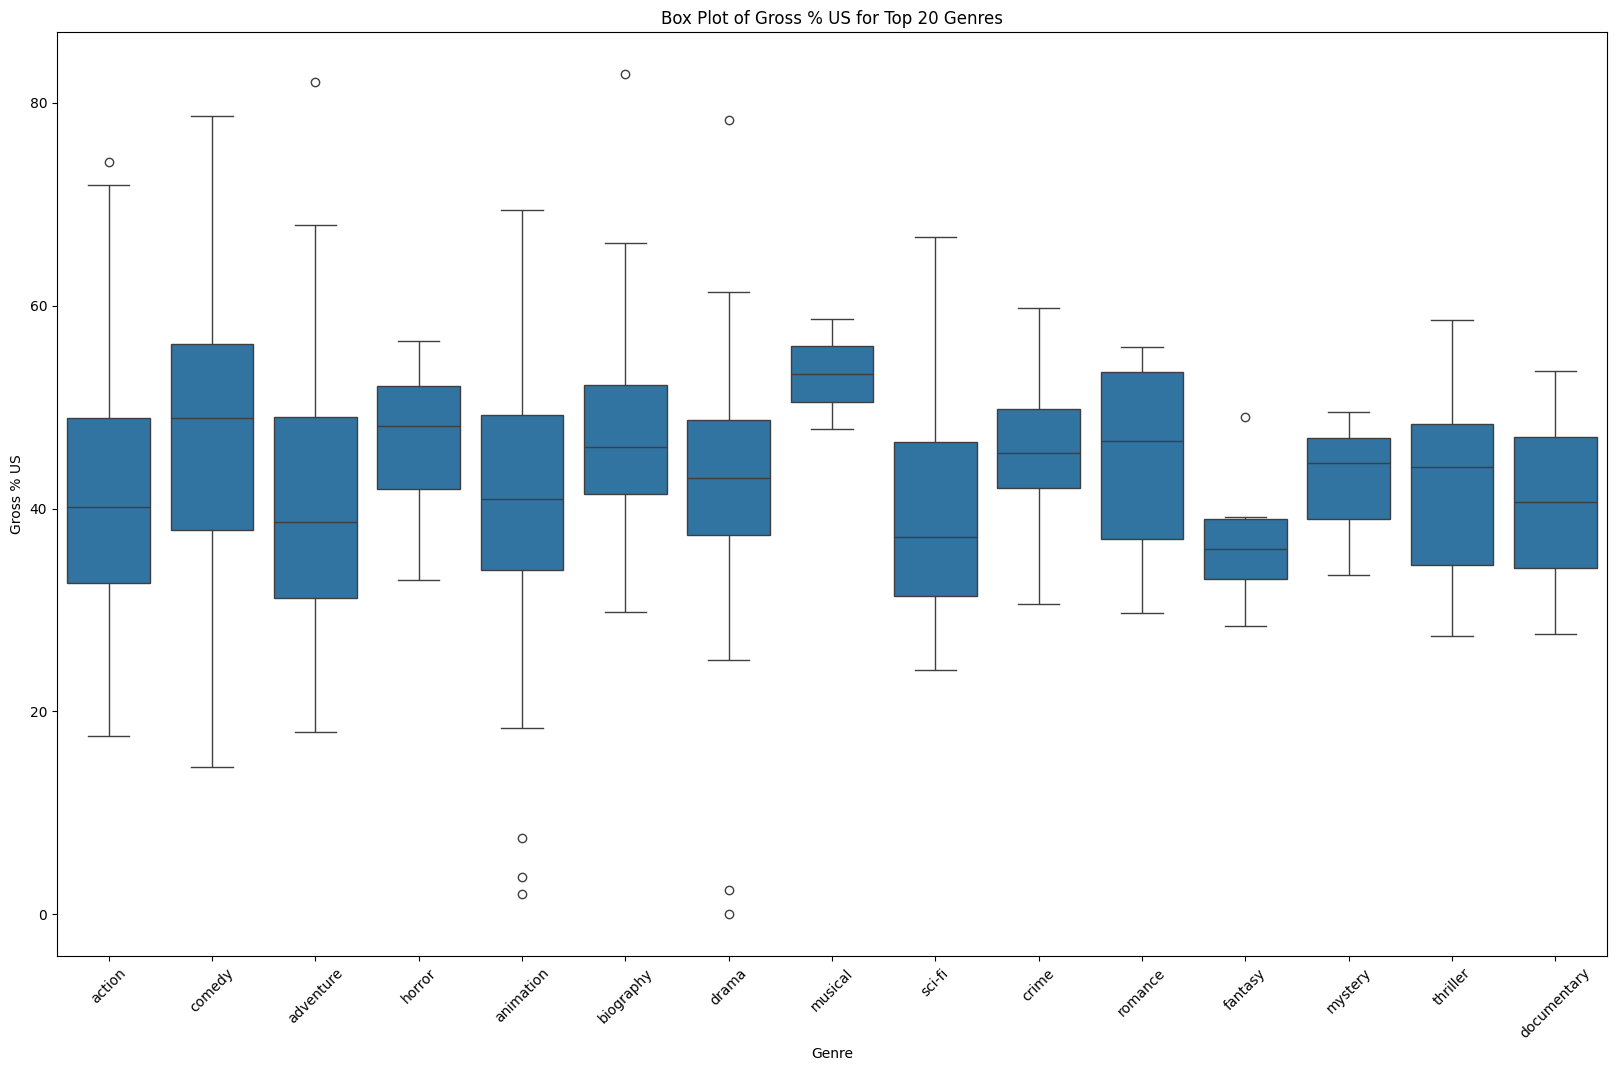

In [ ]:
top_genres = dataset['Genre'].value_counts().nlargest(20).index

# Filter the dataset to include only the top N genres
dataset_top_genres = dataset[dataset['Genre'].isin(top_genres)]

# Plot the box plot with reduced categories
plt.figure(figsize=(20, 12))
sns.boxplot(y="Gross % US", x='Genre', data=dataset_top_genres)
plt.title('Box Plot of Gross % US for Top 20 Genres')
plt.xlabel('Genre')
plt.ylabel('Gross % US')
plt.xticks(rotation=45)
plt.show()

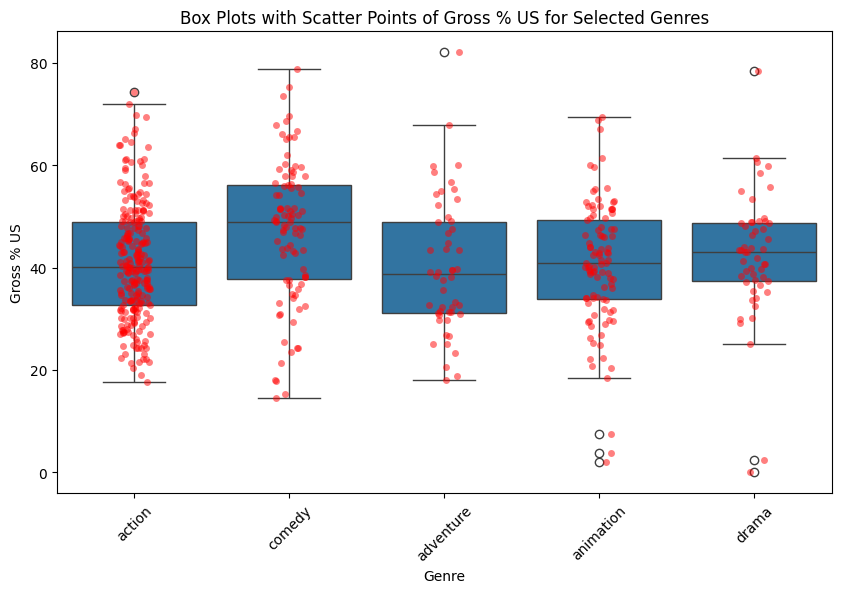

In [ ]:
# Filter the dataset for specific genres
selected_genres = ['action', 'comedy', 'adventure', 'drama', 'animation']
filtered_dataset = dataset[dataset['Genre'].isin(selected_genres)]

# Create a combined plot with box plot and scatter points
plt.figure(figsize=(10, 6))
sns.boxplot(y="Gross % US", x='Genre', data=filtered_dataset)
sns.stripplot(y="Gross % US", x='Genre', data=filtered_dataset, color="red", jitter=True, alpha=0.5)
plt.title('Box Plots with Scatter Points of Gross % US for Selected Genres')
plt.xlabel('Genre')
plt.ylabel('Gross % US')
plt.xticks(rotation=45)
plt.show()


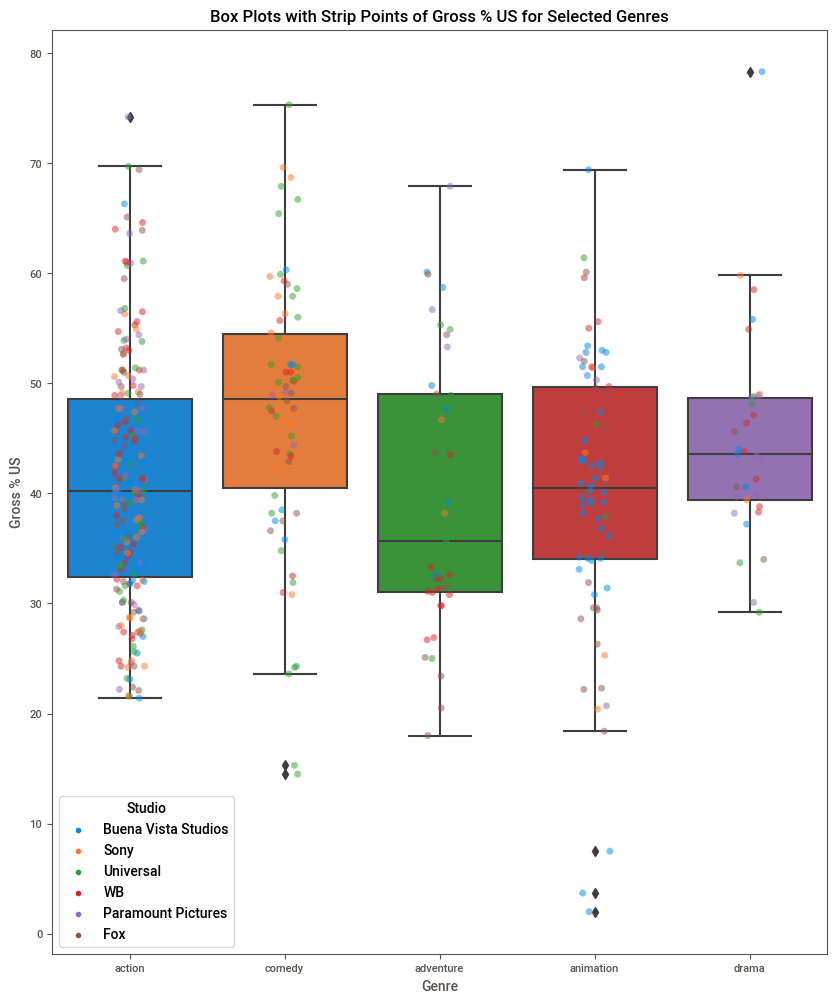

In [236]:
# Assuming 'dataset' is your DataFrame containing the necessary data

# Specify the categories you want to include
selected_studios = ['Buena Vista Studios', 'Sony','Universal','WB','Paramount Pictures','Fox']  # Replace with your desired categories
selected_genres = ['action', 'comedy','adventure','animation','drama']  # Replace with your desired genres

# Filter the dataset based on selected categories and genres
filtered_dataset = dataset[(dataset['Studio'].isin(selected_studios)) & (dataset['Genre'].isin(selected_genres))]
plt.figure(figsize=(10,12))
plt.title('Box Plots with Strip Points of Gross % US for Selected Genres')
# Create a combined boxplot and scatter plot with the filtered dataset
sns.boxplot(y="Gross % US", x='Genre', data=filtered_dataset)
#sns.scatterplot(y="Gross % US", x='Genre', hue='Studio', data=filtered_dataset, marker='o', s=100)  # Adjust marker and size as needed
sns.stripplot(y="Gross % US", x='Genre', hue='Studio', data=filtered_dataset, jitter=True, alpha=0.5)  # Adjust marker as needed

# Display the plot

plt.show()

###Data preparation

In [173]:
dataset.nunique()

Day of Week                 6
Director                  337
Genre                      15
Movie Title               608
Release Date              534
Studio                     36
Adjusted Gross ($mill)    585
Budget ($mill)            152
Gross ($mill)             561
IMDb Rating                50
MovieLens Rating          182
Overseas ($mill)          551
Overseas%                 328
Profit ($mill)            566
Profit%                   589
Runtime (min)             102
US ($mill)                535
Gross % US                328
Profit ($mill)1           566
dtype: int64

In [174]:
dataset.describe()


,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000
mean,545.153125,92.467928,413.466118,6.923849,3.340378,246.332237,57.698849,320.945559,719.278783,117.781250,167.135197,42.301151
std,438.996563,59.421407,258.612104,0.925890,0.454071,184.581069,12.334237,233.887737,1942.807248,23.179122,92.465903,12.334237
min,202.100000,0.600000,200.300000,3.600000,1.490000,46.900000,17.200000,19.900000,7.700000,30.000000,0.000000,0.000000
25%,316.950000,45.000000,246.600000,6.375000,3.037500,135.525000,49.900000,180.700000,201.850000,100.000000,106.950000,33.700000
50%,425.950000,80.000000,327.750000,6.900000,3.365000,189.650000,58.200000,247.700000,338.550000,116.000000,141.700000,41.800000
75%,645.625000,130.000000,475.500000,7.600000,3.672500,283.650000,66.300000,389.750000,650.100000,130.250000,202.100000,50.100000
max,6846.700000,300.000000,2788.000000,9.200000,4.500000,2027.500000,100.000000,2551.000000,41333.300000,238.000000,760.500000,82.800000


In [175]:
dataset.isnull().any()

Day of Week               False
Director                  False
Genre                     False
Movie Title               False
Release Date              False
Studio                    False
Adjusted Gross ($mill)    False
Budget ($mill)            False
Gross ($mill)             False
IMDb Rating               False
MovieLens Rating          False
Overseas ($mill)          False
Overseas%                 False
Profit ($mill)            False
Profit%                   False
Runtime (min)             False
US ($mill)                False
Gross % US                False
Profit ($mill)1           False
dtype: bool

No missing values


<ipython-input-33-ea12190abf7c>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


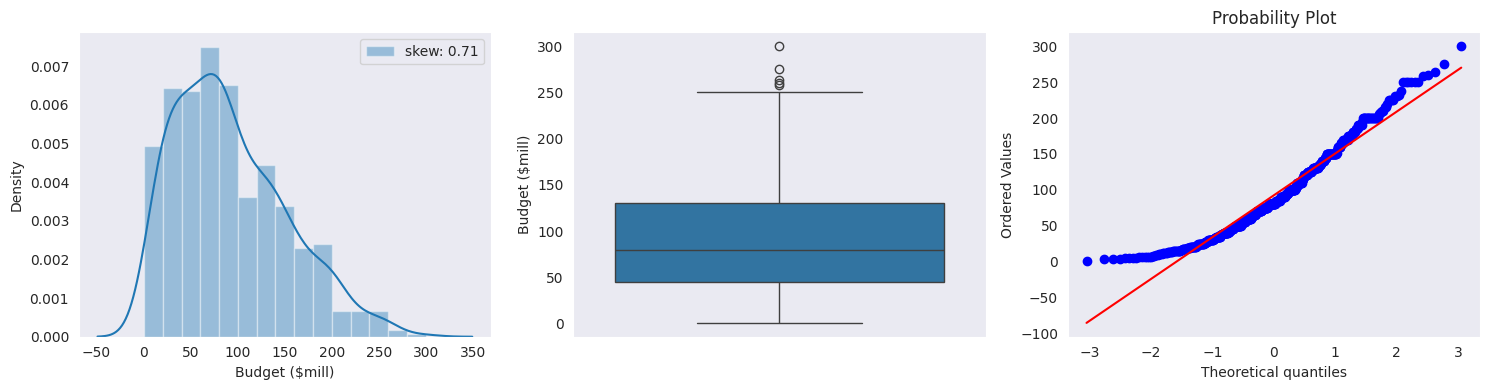

<ipython-input-33-ea12190abf7c>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


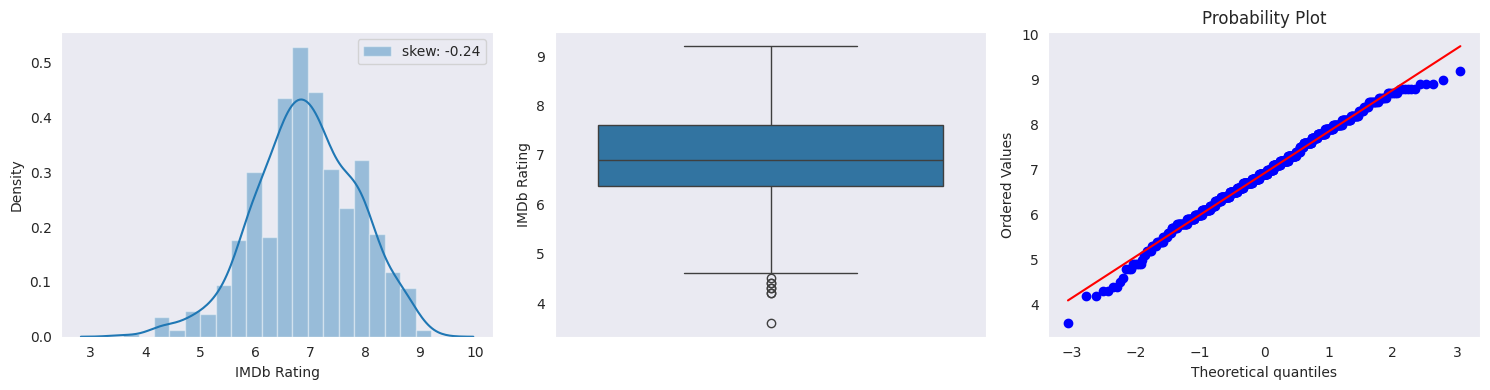

<ipython-input-33-ea12190abf7c>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


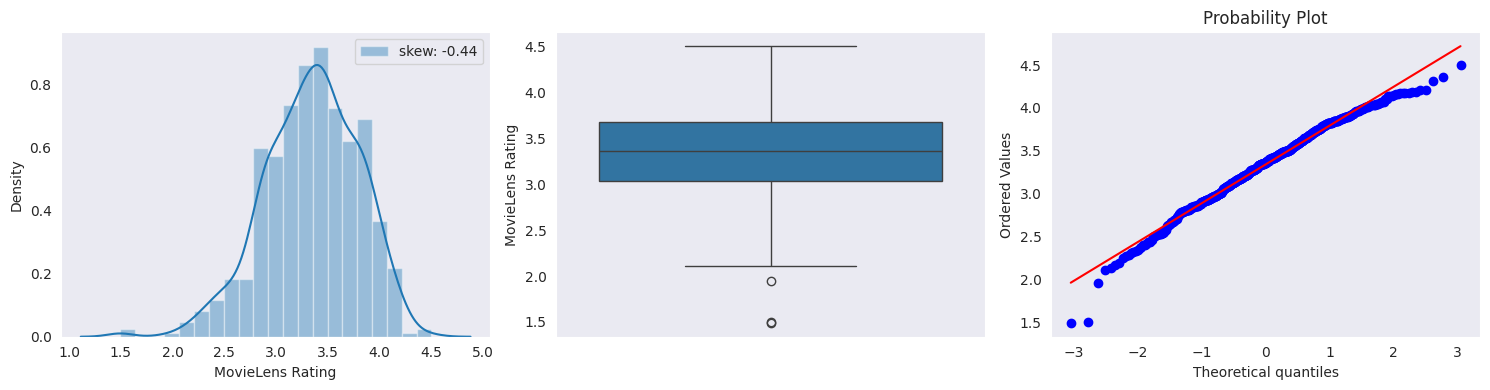

<ipython-input-33-ea12190abf7c>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


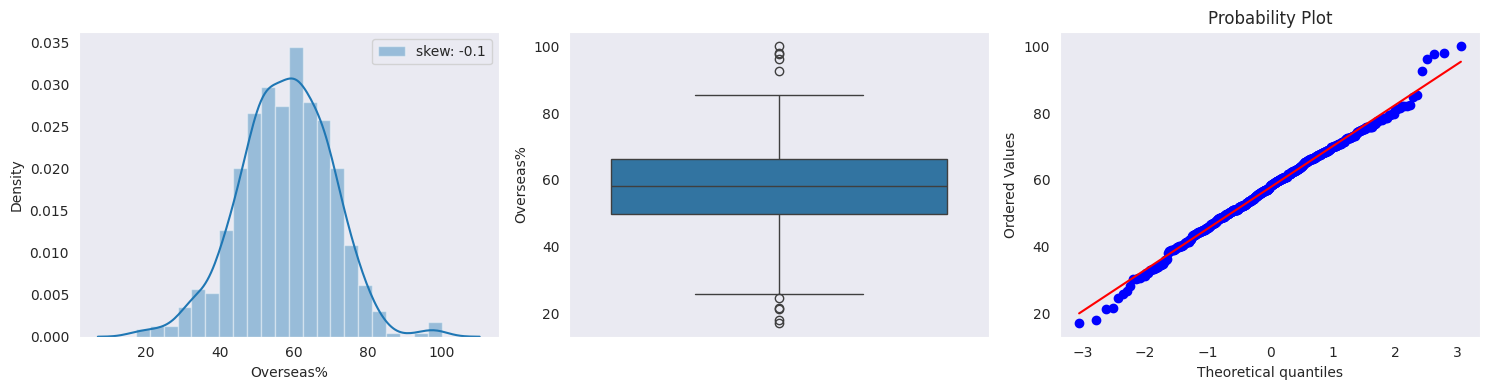

<ipython-input-33-ea12190abf7c>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


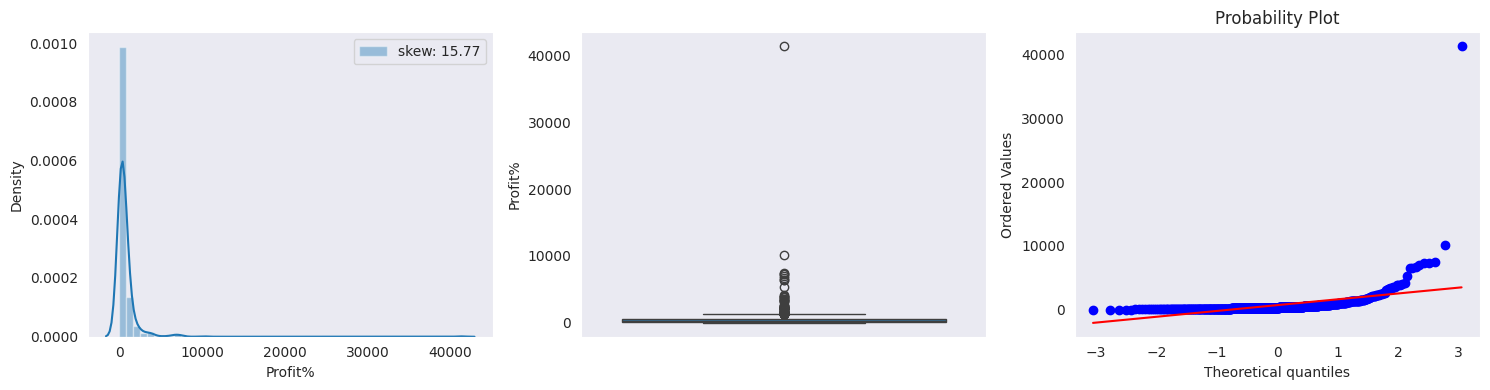

<ipython-input-33-ea12190abf7c>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


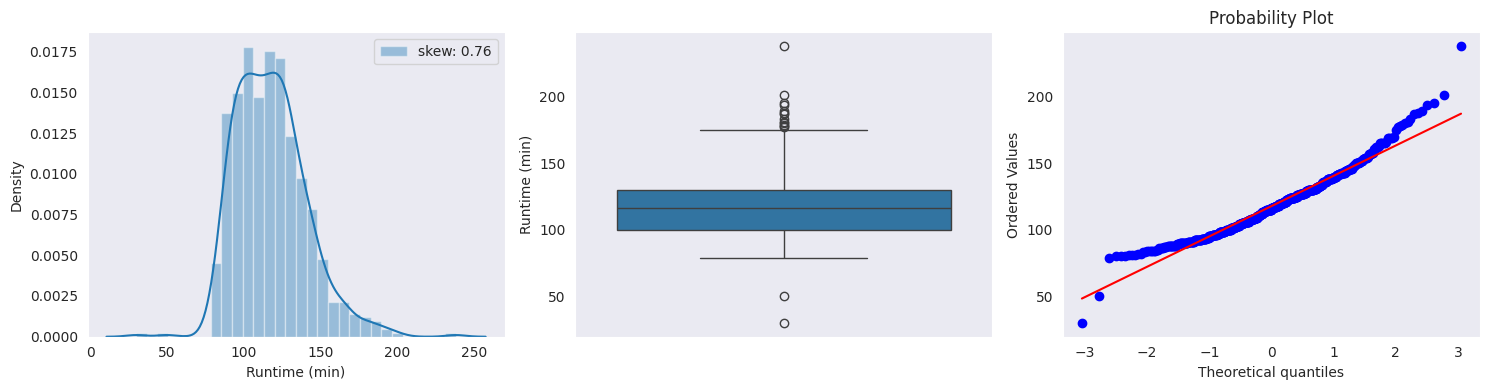

<ipython-input-33-ea12190abf7c>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


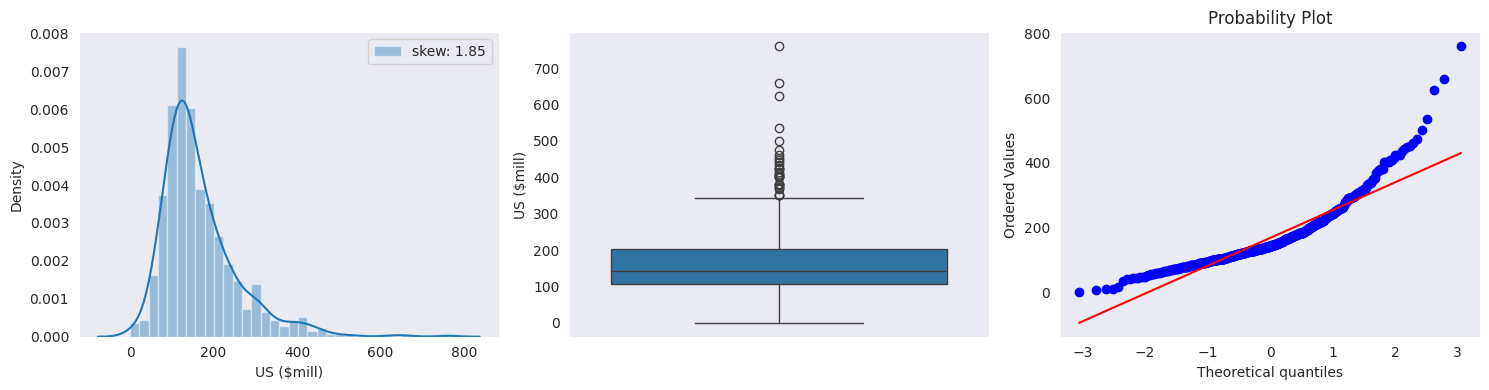

<ipython-input-33-ea12190abf7c>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


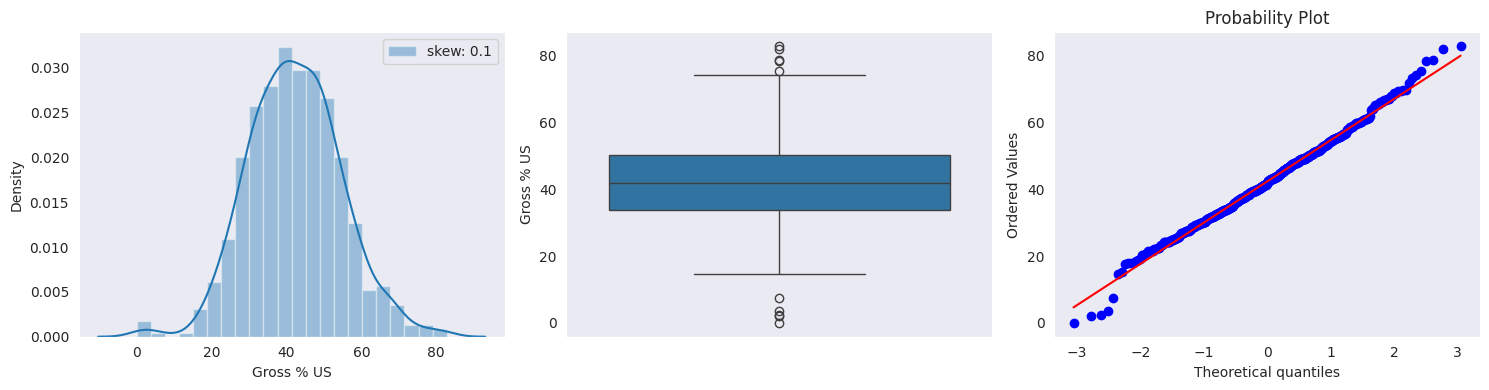

In [ ]:
# Ploting graph for each varables to understand outliers


df=dataset
sns.set_style('dark')
for col in dataset.describe().columns:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    stats.probplot(df[col], plot=plt)
    plt.tight_layout()
    plt.show()

### Data preparartion

In [217]:
# split into X and y
X = dataset.loc[:, ['Director','Genre','Day of Week','Studio','US ($mill)','Gross % US', 'IMDb Rating', 'MovieLens Rating', 'Profit%', 'Runtime (min)', 'Budget ($mill)']]

y  = dataset['Gross ($mill)']

In [218]:
# creating dummy variables for categorical variables

# subset all categorical variables
dataset_categorical = X.select_dtypes(include=['object'])
dataset_categorical.head()

,Director,Genre,Day of Week,Studio
0,Brad Bird,action,Friday,Buena Vista Studios
1,Scott Waugh,action,Friday,Buena Vista Studios
2,Patrick Hughes,action,Friday,Lionsgate
3,"Phil Lord, Chris Miller",comedy,Friday,Sony
4,Roland Emmerich,action,Friday,Sony


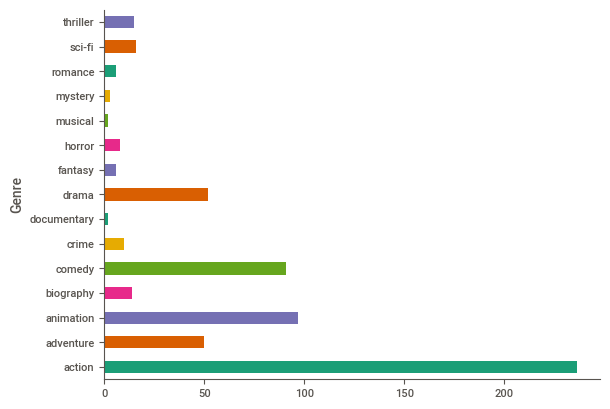

In [243]:

dataset_categorical.groupby('Genre').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)


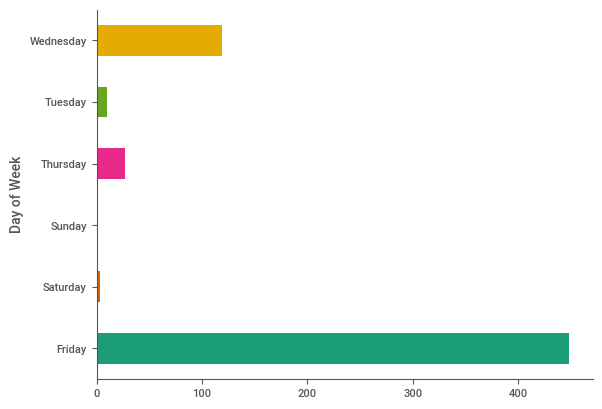

In [181]:
# @title Day of Week


dataset_categorical.groupby('Day of Week').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [221]:
# convert into dummies
dataset_dummies = pd.get_dummies(dataset_categorical, drop_first=True)
dataset_dummies.head()

,Director_Adam Shankman,Director_Adrian Lyne,Director_Alan Taylor,Director_Alejandro Amenˆbar,Director_Alex Proyas,Director_Alfonso Cuar„n,Director_Amy Heckerling,Director_Andrew Adamson,"Director_Andrew Adamson, Kelly Asbury, Conrad Vernon","Director_Andrew Adamson, Vicky Jenson",...,Studio_StudioCanal,Studio_Summit Entertainment,Studio_TriStar,Studio_UA Entertainment,Studio_USA,Studio_Universal,Studio_Vestron Pictures,Studio_WB,Studio_WB/New Line,Studio_Weinstein Company
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [219]:
# drop categorical variables
X = X.drop(list(dataset_categorical.columns), axis=1)

In [222]:
# concat dummy variables with X
X = pd.concat([X, dataset_dummies], axis=1)

In [223]:
# creating a linear model
print(X), print(y)

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=1)

     US ($mill)  Gross % US  IMDb Rating  MovieLens Rating  Profit%  \
0          90.2        44.6          6.7              3.26     18.9   
1          43.6        21.4          6.6              2.97    208.0   
2          39.3        19.1          6.1              2.93    106.2   
3         138.4        68.7          7.2              3.62    380.0   
4          73.1        35.6          8.0              3.65     36.9   
..          ...         ...          ...               ...      ...   
603       232.9        52.8          6.9              3.39   3577.5   
604       461.0        59.5          8.7              4.19   6949.1   
605       760.5        27.3          7.9              3.78   1076.4   
606       658.7        30.1          7.7              3.38    993.4   
607       198.7        49.6          8.2              3.83  10161.5   

     Runtime (min)  Budget ($mill)  Director_Adam Shankman  \
0              130           170.0                       0   
1              132     

In [224]:
print(y_train)

76     242.7
257    314.4
311    240.0
289    215.4
68     245.7
       ...  
129    215.7
144    304.7
72     231.4
235    250.8
37     227.8
Name: Gross ($mill), Length: 456, dtype: float64


In [225]:
# fitting a linear model

lm = lm_().fit(x_train,y_train)
# for i in range (len(x_train.columns)):
#     print("the coeff of {} variable is {}".format(x_train.columns[i],lm.coef_[i]))
#     print("the coeff of {} variable is {}".format('intercept',lm.intercept_[0]))

# model.coef_[1]
print(lm.coef_)

[ 2.56490152e+00 -9.31116159e+00  1.05814994e+01 -3.28853066e+01
 -5.74177502e-03  7.82978744e-01  1.75660328e-01  7.58789195e+01
 -1.71710427e+00  7.18010231e+01  7.42718359e+01  1.16178803e+01
  5.36608706e+01  2.66971223e+01 -1.30722196e+01 -1.14762742e+02
 -3.06199274e+01  4.73841411e-10 -6.26607683e+01 -3.20790686e+01
  3.16613647e+01  3.29938611e+01  8.32124615e+01  4.47449588e+01
 -6.19202362e+01 -8.82769413e-11 -2.81384908e+01  8.99537979e+00
  7.48092584e+01 -9.34083940e+01  2.50693688e-10  8.46701658e+01
 -1.07790035e+01 -3.16617843e-11 -4.21724583e+01  4.90528304e+01
 -3.50124668e+01  1.14783824e+01 -1.88164184e+01  1.01611399e+02
  4.37909561e+01  2.47605232e+01  3.03622103e+01 -9.41925123e+00
  1.62329728e+01 -5.26902966e-11  4.22286177e+01  2.49542609e-11
  2.88394171e+01  7.00557927e+01  1.21138157e+01 -2.34922566e+01
 -9.78932491e-11  1.54910006e+02  2.00522714e+01  8.96923688e+01
  4.64926330e+00 -3.46744855e-12  2.21536390e+01  2.65371138e+01
  4.67709904e+00 -7.36122

In [226]:
Coef_df=pd.DataFrame(zip(x_train.columns,lm.coef_))
Coef_df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,387,388,389,390,391,392,393,394,395,396
0,US ($mill),Gross % US,IMDb Rating,MovieLens Rating,Profit%,Runtime (min),Budget ($mill),Director_Adam Shankman,Director_Adrian Lyne,Director_Alan Taylor,...,Studio_StudioCanal,Studio_Summit Entertainment,Studio_TriStar,Studio_UA Entertainment,Studio_USA,Studio_Universal,Studio_Vestron Pictures,Studio_WB,Studio_WB/New Line,Studio_Weinstein Company
1,2.564902,-9.311162,10.581499,-32.885307,-0.005742,0.782979,0.17566,75.878919,-1.717104,71.801023,...,-0.0,11.771001,-34.205882,-19.797134,0.0,-1.684201,-99.868537,-16.349631,11.996118,-114.82157


In [227]:
# Get all the model performace parameters
# we can get train error

y_train_pred=lm.predict(x_train)


mean_l1_error_train=metrics.mean_absolute_error(y_train,y_train_pred)
mean_l2_error_train=metrics.mean_squared_error(y_train,y_train_pred)
Rootmean_l2_error_train=np.sqrt(metrics.mean_squared_error(y_train,y_train_pred))

train_accuracy = lm.score(x_train, y_train)
# lm.score(x_train,y_train) same as above
print("mean_l1_error_train is {} mean_l2_error_train is {} Rootmean_l2_error_train is {} and accuracy is {}".format(mean_l1_error_train,mean_l2_error_train,Rootmean_l2_error_train,train_accuracy))

mean_l1_error_train is 14.949233793613827 mean_l2_error_train is 808.7632185729649 Rootmean_l2_error_train is 28.43876260622049 and accuracy is 0.9850019276804963


In [228]:
# model parameters and annova
import statsmodels.api as sm
x_train_final=sm.add_constant(x_train)
model_object=sm.OLS(y_train,x_train_final)
model=model_object.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Gross ($mill)   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     24.88
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           4.59e-59
Time:                        18:49:21   Log-Likelihood:                -2173.6
No. Observations:                 456   AIC:                             5009.
Df Residuals:                     125   BIC:                             6374.
Df Model:                         330                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [229]:
DF_y_train_pred=pd.DataFrame(y_train_pred,columns=['Gross_predict'])
x_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
DF_y_train_pred.reset_index(drop=True, inplace=True)

Train_with_pred=pd.concat([x_train,y_train,DF_y_train_pred], axis=1)
Train_with_pred

,US ($mill),Gross % US,IMDb Rating,MovieLens Rating,Profit%,Runtime (min),Budget ($mill),Director_Adam Shankman,Director_Adrian Lyne,Director_Alan Taylor,...,Studio_TriStar,Studio_UA Entertainment,Studio_USA,Studio_Universal,Studio_Vestron Pictures,Studio_WB,Studio_WB/New Line,Studio_Weinstein Company,Gross ($mill),Gross_predict
0,143.2,59.0,6.2,2.96,304.5,115,60.0,0,0,0,...,0,0,0,0,0,0,0,0,242.7,242.700000
1,135.4,43.1,5.8,2.91,424.0,81,60.0,0,0,0,...,0,0,0,0,0,0,0,0,314.4,314.400000
2,117.5,49.0,7.1,3.42,242.9,124,70.0,0,0,0,...,0,0,0,0,0,0,0,0,240.0,229.909889
3,112.5,52.2,6.5,2.98,482.2,108,37.0,0,0,0,...,0,0,0,0,0,0,0,0,215.4,206.969603
4,123.5,50.3,7.3,3.51,82.0,107,135.0,0,0,0,...,0,0,0,0,0,0,0,0,245.7,237.879031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,69.2,32.1,5.8,2.85,187.6,124,75.0,0,0,0,...,0,0,0,0,0,0,0,0,215.7,267.655387
452,67.3,22.1,5.3,2.59,231.2,98,92.0,0,0,0,...,0,0,0,0,0,0,0,0,304.7,304.700000
453,143.5,62.0,6.3,2.97,3205.7,96,7.0,0,0,0,...,0,0,0,0,0,0,0,0,231.4,231.400000
454,115.8,46.2,6.5,3.16,285.9,119,65.0,0,0,0,...,0,0,0,0,0,1,0,0,250.8,293.695844


In [230]:
# Get the model tested on test data

y_test_pred=lm.predict(x_test)



mean_l1_error_test=metrics.mean_absolute_error(y_test,y_test_pred)
mean_l2_error_test=metrics.mean_squared_error(y_test,y_test_pred)
Rootmean_l2_error_test=round(np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)),10)
# Rootmean_l2_error_test=round(np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)),10)

test_accuracy = lm.score(x_test, y_test)
print(pd.DataFrame(zip(x_test,y_test,y_test_pred)))
print("mean_l1_error_test is {} mean_l2_error_test is {} Rootmean_l2_error_test is {} and rmse_test is {}".format(mean_l1_error_test,mean_l2_error_test,Rootmean_l2_error_test,test_accuracy))

                                0      1            2
0                      US ($mill)  211.7   231.745319
1                      Gross % US  336.4   401.129799
2                     IMDb Rating  288.3   296.848518
3                MovieLens Rating  626.1   676.025349
4                         Profit%  263.4   298.505594
..                            ...    ...          ...
147  Director_Jennifer Yuh Nelson  368.9   301.437892
148         Director_Jerry Zucker  926.0  1059.883228
149          Director_Jesse Dylan  203.6   243.231934
150         Director_Joe Johnston  585.3   563.662661
151            Director_Joe Pytka  254.1   251.651157

[152 rows x 3 columns]
mean_l1_error_test is 61.494189829800185 mean_l2_error_test is 8552.002116987895 Rootmean_l2_error_test is 92.4770356196 and rmse_test is 0.9181761622806326


In [244]:
DF_y_test_pred=pd.DataFrame(y_test_pred,columns=['Gross_predict'])
x_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
DF_y_test_pred.reset_index(drop=True, inplace=True)

Test_with_pred=pd.concat([x_test,y_test,DF_y_test_pred], axis=1)
Test_with_pred

,US ($mill),Gross % US,IMDb Rating,MovieLens Rating,Profit%,Runtime (min),Budget ($mill),Director_Adam Shankman,Director_Adrian Lyne,Director_Alan Taylor,...,Studio_TriStar,Studio_UA Entertainment,Studio_USA,Studio_Universal,Studio_Vestron Pictures,Studio_WB,Studio_WB/New Line,Studio_Weinstein Company,Gross ($mill),Gross_predict
0,47.4,22.4,7.2,3.47,92.5,145,110.0,0,0,0,...,0,0,0,0,0,0,0,0,211.7,231.745319
1,90.8,27.0,6.6,3.26,68.2,116,200.0,0,0,0,...,0,0,0,0,0,0,0,0,336.4,401.129799
2,95.3,33.1,4.2,2.32,203.5,146,95.0,0,0,0,...,0,0,0,0,0,0,1,0,288.3,296.848518
3,209.8,33.5,7.3,3.44,400.9,130,125.0,0,0,0,...,0,0,0,1,0,0,0,0,626.1,676.025349
4,134.8,51.2,6.9,3.34,92.3,138,137.0,0,0,0,...,0,0,0,1,0,0,0,0,263.4,298.505594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,183.9,49.8,7.8,3.99,738.4,130,44.0,0,0,0,...,0,0,0,0,0,1,0,0,368.9,301.437892
148,342.6,37.0,8.7,4.10,885.1,179,94.0,0,0,0,...,0,0,0,0,0,0,0,0,926.0,1059.883228
149,51.9,25.5,6.3,3.05,126.2,126,90.0,0,0,0,...,0,0,0,0,0,0,0,0,203.6,243.231934
150,256.4,43.8,7.2,3.50,290.2,101,150.0,0,0,0,...,0,0,0,0,0,1,0,0,585.3,563.662661


Model training and parameter tuning

Mean Squared Error: 13023.347345047994
Mean absolute Error: 82.6267226228714


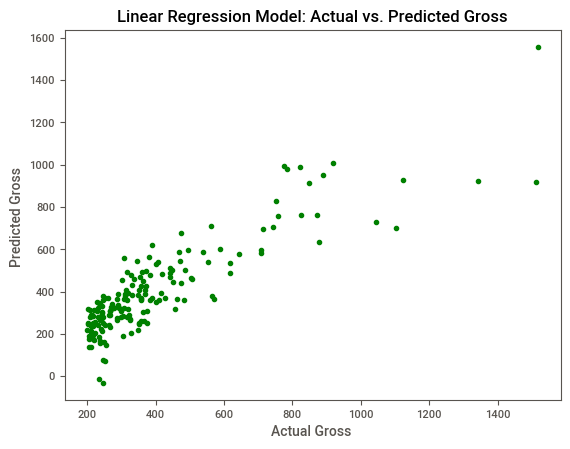

In [216]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

# Assuming 'dataset' is your DataFrame containing the necessary data

# Split the data into features (X) and target variable (y)
features = dataset[['US ($mill)', 'Budget ($mill)']]
X = features
y = dataset['Gross ($mill)']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

from sklearn.metrics import mean_absolute_error
acc=mean_absolute_error(y_test,y_pred)
print(f'Mean absolute Error: {acc}')
colors=np.array(["red","blue"])
# Visualize the predicted vs. actual values
plt.scatter(y_test, y_pred,color='g')
plt.xlabel('Actual Gross ')
plt.ylabel('Predicted Gross ')
plt.title('Linear Regression Model: Actual vs. Predicted Gross')
plt.show()

Model evaluation

In [184]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 24.0%


In [185]:
from sklearn.metrics import mean_absolute_error
acc=mean_absolute_error(y_test,y_pred)
acc

8.97134954644101

In [255]:
import pandas as pd
import sweetviz as sv
import numpy as np
X = np.asarray(dataset[['US ($mill)',  'Budget ($mill)']])
y = np.asarray(dataset['Gross ($mill)'])
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = StandardScaler().fit(X).transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
report2 = sv.analyze([dataset,'Train'], target_feat='Gross ($mill)')
#report.show_html()

                                             |                                             | [  0%]   00:00 ->…

In [256]:
report2.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
